In [57]:
import pandas as pd
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from matplotlib import pyplot as plt

In [58]:
df = pd.read_csv(r'C:\Users\deven\Downloads\VMResourceUtilizationSlope.csv')

In [59]:
df.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0,0,79.8981,5.5275,...,0.0,24.3045,89.9850,0,0.0,0.0,0,0,0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0,0,0.0000,0.0000,...,0.0,5.9061,89.8986,0,0.0,0.0,0,0,0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0,0,0.0000,0.0000,...,0.0,32.8285,89.9897,0,0.0,0.0,0,0,0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0,0,0.0000,0.0000,...,0.0,4.2364,89.8741,0,0.0,0.0,0,0,0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0,0,0.0000,0.0000,...,0.0,22.7510,89.9864,0,0.0,0.0,0,0,0,Normal


In [60]:
df.describe()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
count,9.594000e+03,9594.000000,9594.000000,9594.000000,9594.0,9594.0,9594.000000,9594.000000,9594.0,9594.0,...,9594.000000,9594.000000,9594.000000,9594.000000,9594.0,9594.000000,9594.000000,9594.0,9594.0,9594.0
mean,1.604482e+09,7.551178,88.237795,35.454518,0.0,0.0,31.755948,22.272845,0.0,0.0,...,0.869522,2.360632,31.607359,80.303610,0.0,0.024526,0.056261,0.0,0.0,0.0
std,8.162846e+04,1.731400,0.779002,18.590801,0.0,0.0,41.176777,36.895174,0.0,0.0,...,7.763400,14.373804,27.642737,27.866019,0.0,1.105076,2.249146,0.0,0.0,0.0
min,1.604406e+09,1.000000,58.392500,1.789900,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,1.604424e+09,6.000000,87.797400,26.565100,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,11.309900,89.963100,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,1.604442e+09,8.000000,87.954600,28.072500,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,18.434900,89.983900,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.604589e+09,9.000000,88.264300,30.963800,0.0,0.0,81.275200,23.782000,0.0,0.0,...,0.000000,0.000000,62.650100,89.995100,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.604636e+09,10.000000,89.999900,89.915700,0.0,0.0,90.000000,89.998200,0.0,0.0,...,89.593000,90.000000,89.083800,90.000000,0.0,64.840700,89.992100,0.0,0.0,0.0


In [61]:
y = df['Status']

X = df.drop(columns=['LAST_POLL', 'VMID','UUID','dom', 'Status'])
X = X.astype(float)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9594 entries, 0 to 9593
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rxbytes_slope             9594 non-null   float64
 1   rxpackets_slope           9594 non-null   float64
 2   rxerrors_slope            9594 non-null   float64
 3   rxdrops_slope             9594 non-null   float64
 4   txbytes_slope             9594 non-null   float64
 5   txpackets_slope           9594 non-null   float64
 6   txerrors_slope            9594 non-null   float64
 7   txdrops_slope             9594 non-null   float64
 8   timecpu_slope             9594 non-null   float64
 9   timesys_slope             9594 non-null   float64
 10  timeusr_slope             9594 non-null   float64
 11  state_slope               9594 non-null   float64
 12  memmax_slope              9594 non-null   float64
 13  mem_slope                 9594 non-null   float64
 14  cpus_slo

In [63]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Status, dtype: object

In [64]:
X.head()

,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
0,88.2065,30.1414,0.0,0.0,79.8981,5.5275,0.0,0.0,0.0000,0.0,...,0.0,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0
1,87.8708,27.3499,0.0,0.0,0.0000,0.0000,0.0,0.0,73.8278,0.0,...,0.0,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0
2,87.8865,27.2996,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,...,0.0,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0
3,87.8760,27.4076,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,...,0.0,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0
4,87.7241,25.8210,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,...,0.0,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
seed = 50  # so that the result is reproducible
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.333, random_state = seed)

In [67]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_train

array([1, 1, 1, ..., 0, 1, 1])

## Model 1: Printing class label using sigmoid activation and last layer with 1 neuron.

In [68]:

model = Sequential()
model.add(Dense(156, input_dim=39, activation='relu'))
model.add(Dense(78, input_dim=39, activation='relu'))
model.add(Dense(39, input_dim=39, activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [69]:
history = model.fit(X_train, encoded_y_train, batch_size = 10, epochs = 100, verbose=False)

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 156)               6240      
                                                                 
 dense_13 (Dense)            (None, 78)                12246     
                                                                 
 dense_14 (Dense)            (None, 39)                3081      
                                                                 
 dropout_3 (Dropout)         (None, 39)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 40        
                                                                 
Total params: 21,607
Trainable params: 21,607
Non-trainable params: 0
_________________________________________________________________


In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

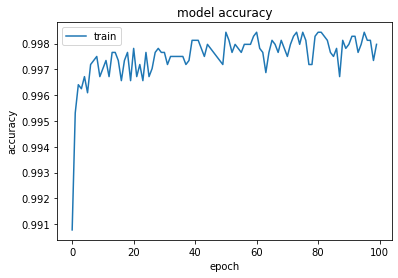

In [76]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

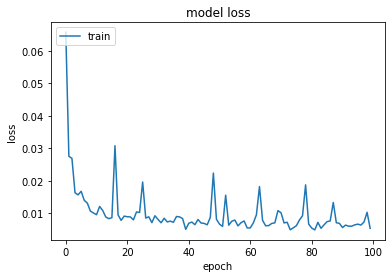

In [77]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Test Dataset Prediction with Model 1

In [78]:
encoded_y_pred=model.predict(X_test)

print(type(encoded_y_pred))
print(encoded_y_pred.max())
print(encoded_y_pred.min())

<class 'numpy.ndarray'>
1.0
0.0


### Undertanding which class the LabelEncoder encoded as 0 and which as 1

In [79]:
list(encoder.classes_)

['Attack', 'Normal']

In [80]:
encoder.transform(['Normal','Attack'])

array([1, 0])

In [81]:

encoded_y_pred= encoded_y_pred.astype(int)

encoded_y_pred


array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [82]:
y_pred = encoder.inverse_transform(encoded_y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Evaluating Model 1

In [83]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9902973395931143


In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Attack       0.96      1.00      0.98       772
      Normal       1.00      0.99      0.99      2423

    accuracy                           0.99      3195
   macro avg       0.98      0.99      0.99      3195
weighted avg       0.99      0.99      0.99      3195



In [86]:
print(confusion_matrix(y_test,y_pred, labels=['Attack','Normal']))

[[ 772    0]
 [  31 2392]]


## Model 2: Printing probabilities/confidence using softmax activation and last layer with 2 neurons

In [89]:
model2 = Sequential()
model2.add(Dense(156, input_dim=39, activation='relu'))
model2.add(Dense(78, input_dim=39, activation='relu'))
model2.add(Dense(39, input_dim=39, activation='relu'))
model2.add(Dropout(rate = 0.1))
model2.add(Dense(2, activation='softmax'))

In [90]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [91]:
history2 = model2.fit(X_train, encoded_y_train, batch_size = 10, epochs = 100, verbose=False)

In [92]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 156)               6240      
                                                                 
 dense_25 (Dense)            (None, 78)                12246     
                                                                 
 dense_26 (Dense)            (None, 39)                3081      
                                                                 
 dropout_6 (Dropout)         (None, 39)                0         
                                                                 
 dense_27 (Dense)            (None, 2)                 80        
                                                                 
Total params: 21,647
Trainable params: 21,647
Non-trainable params: 0
_________________________________________________________________


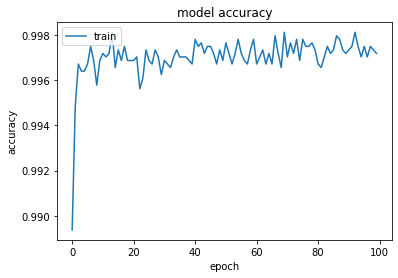

In [93]:
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

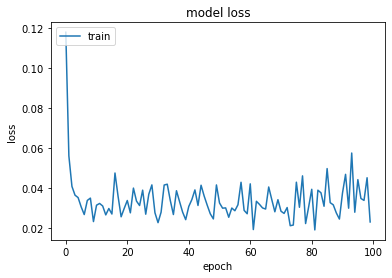

In [94]:
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Test Dataset Prediction with Model 2

In [97]:
encoded_y_pred=model2.predict(X_test)

In [98]:
encoded_y_pred

array([[1.0000000e+00, 0.0000000e+00],
       [3.5818954e-34, 1.0000000e+00],
       [1.3573135e-38, 1.0000000e+00],
       ...,
       [2.4416161e-07, 9.9999976e-01],
       [4.0493524e-09, 1.0000000e+00],
       [9.4520100e-11, 1.0000000e+00]], dtype=float32)

In [113]:
X_test[:1]

,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,timecpu_slope,timesys_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope


### Using Model 1 for a single Prediction

In [117]:
input = np.array(X_test[:1])
input = input.reshape(1,39)
preds=model.predict(input)
preds

array([[0.]], dtype=float32)

In [118]:
print("PREDICTED:", 'Attack' if preds[0][0]<0.5 else 'Normal')

PREDICTED: Attack


### Using Model 2 for a single Prediction

In [119]:
input = np.array(X_test[:1])
input = input.reshape(1,39)
preds=model2.predict(input)
preds

array([[1., 0.]], dtype=float32)

In [120]:
print("Model Predicts  " + str(preds[0][0]*100) + " %  Attack")
print("Model Predicts " + str(preds[0][1]*100) + " %  Normal")

Model Predicts  100.0 %  Attack
Model Predicts 0.0 %  Normal


### Dot files and png's for the 2 models

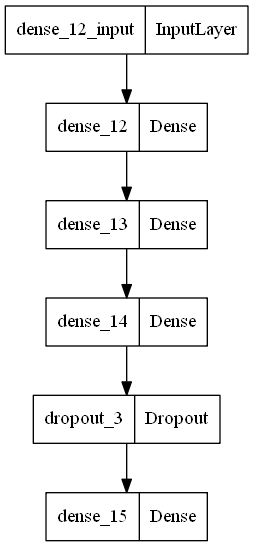

In [99]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cloud_forensics_model1.png')

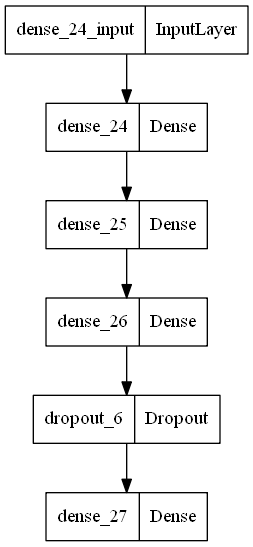

In [100]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='cloud_forensics_model2.png')